## Principle Component Analysis
Visualization, Feature Engineering, and Feature Reduction. Having a lot of features is not ideal most of the time. We can use PCA to simplify the complexity in high-dimensional data while maintaining trends and patterns.\
A new coordinate system is built, where the coordinates are orthogonal and capture maximum variance in data.\
Used for data visualization, noise reduction, feature extraction, and data pre-processing before machine learning algorithms.\
This is an unsupervised model, so we actually will ONLY be playing with the features, not the target.

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import pandas as pd

In [12]:
iris = load_iris()
X = iris.data
y = iris.target # We won't be using this.

In [13]:
pd.DataFrame(X)

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [14]:
# Import the class
from sklearn.decomposition import PCA

# I originally have 4 components and want to try and get 2 components.
pca = PCA(n_components=2)

# We will fit this transformation to our features.
X_pca = pca.fit_transform(X)

In [15]:
# These are the linear combinations that come out.
pca.components_
'''
Principle Component 1 = 0.36x1 - 0.08x2 + 0.86x3 + 0.36x4
Principle Component 2 = 0.66x1 + 0.73x2 - 0.17x3 - 0.08x4
'''
# Notice how the third feature is pretty significant in the first component.
# Also notice how the first and second feature is also significant in the second component.

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102]])

In [16]:
pca.explained_variance_ratio_

array([0.92461872, 0.05306648])

In [17]:
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

In [18]:
cumulative_variance_ratio = np.insert(cumulative_variance_ratio, 0, 0)

In [19]:
cumulative_variance_ratio

array([0.        , 0.92461872, 0.97768521])

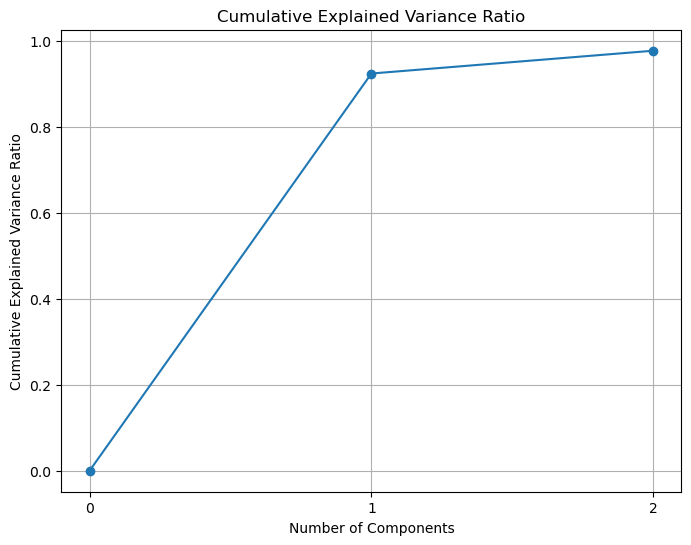

In [20]:
plt.figure(figsize=(8, 6))
plt.plot(range(0, len(cumulative_variance_ratio)), cumulative_variance_ratio, marker='o', linestyle='-')
plt.title('Cumulative Explained Variance Ratio')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.xticks(np.arange(0, len(cumulative_variance_ratio)))
plt.grid(True)
plt.show()

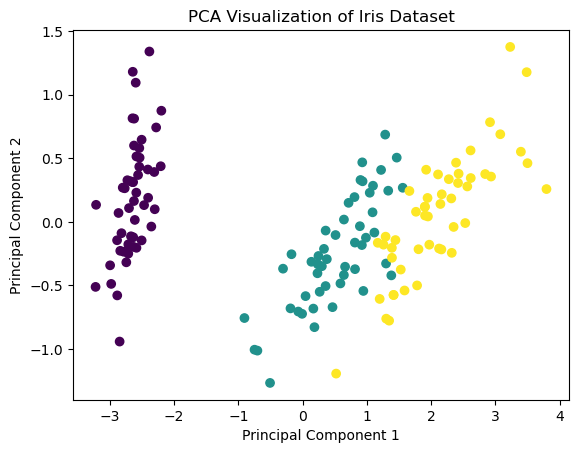

In [21]:
# Plot the data in the reduced space
# So we went from 4 dimensional data to 2 dimensional data.
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization of Iris Dataset')
plt.show()

# PCA for Noise Reduction

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA

In [23]:
digits = load_digits()
X = digits.data
y = digits.target

In [24]:
noise = np.random.normal(0, 4.0, size=X.shape)
X_noisy = X + noise

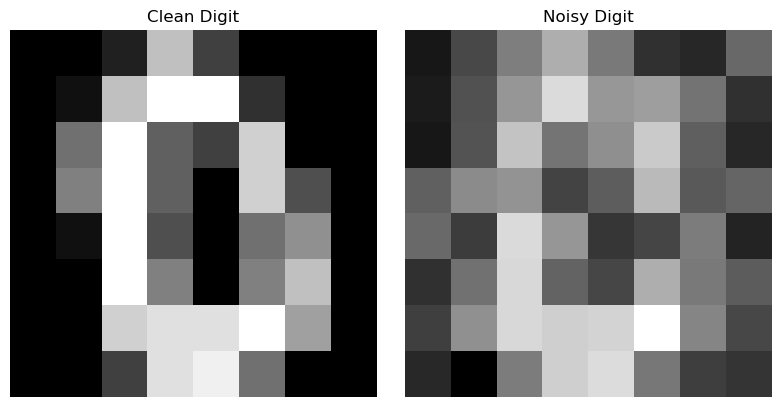

In [25]:
# Plot a random digit before noise reduction
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.imshow(X[150].reshape(8, 8), cmap='gray')
plt.title('Clean Digit')
plt.axis('off')

# Plot the noisy digit
plt.subplot(1, 3, 2)
plt.imshow(X_noisy[150].reshape(8, 8), cmap='gray')
plt.title('Noisy Digit')
plt.axis('off')


plt.tight_layout()
plt.show()

In [26]:
X[150].shape

(64,)

In [27]:
# Instead of using 64 features (8x8 grid), we will try and do 20 features.
pca = PCA(n_components=20) 
X_reduced = pca.fit_transform(X_noisy)

# Take the 20 components back into the original space.
# We do this because we want to get back our number.
X_reconstructed = pca.inverse_transform(X_reduced)

In [28]:
X_reduced[150].shape

(20,)

In [29]:
X_reconstructed[150].shape

(64,)

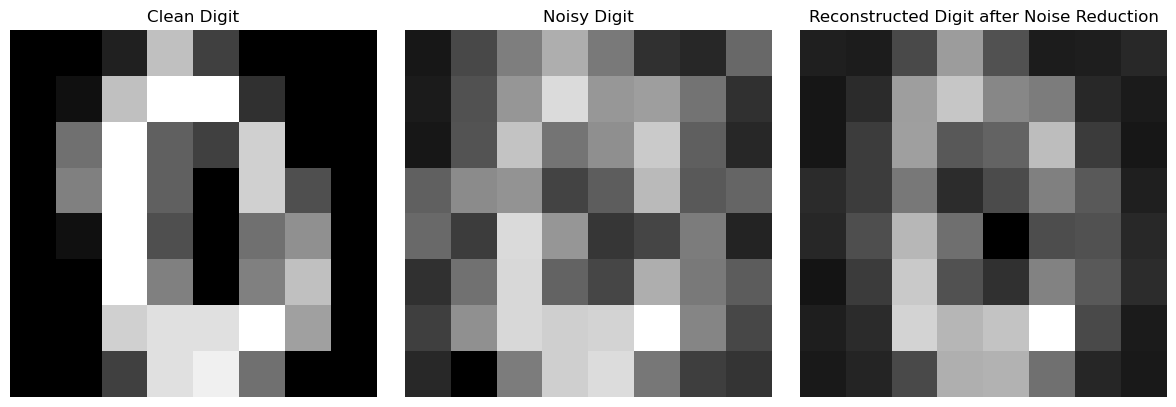

In [30]:
# Plot a random digit before noise reduction
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.imshow(X[150].reshape(8, 8), cmap='gray')
plt.title('Clean Digit')
plt.axis('off')

# Plot the noisy digit
plt.subplot(1, 3, 2)
plt.imshow(X_noisy[150].reshape(8, 8), cmap='gray')
plt.title('Noisy Digit')
plt.axis('off')


#plot reconstructed image
plt.subplot(1, 3, 3)
plt.imshow(X_reconstructed[150].reshape(8, 8), cmap='gray')
plt.title('Reconstructed Digit after Noise Reduction')
plt.axis('off')

plt.tight_layout()
plt.show()